In [1]:
using DelimitedFiles
using CairoMakie

include("../Modules/TestingFunctions.jl")
using .TestingFunctions

In [2]:
lo_train = vec(readdlm(joinpath(@__DIR__, "..", "Data", "lorenz_train_0_01.txt")))
lo_test = vec(readdlm(joinpath(@__DIR__, "..", "Data", "lorenz_test_0_01.txt")))

ro_train = vec(readdlm(joinpath(@__DIR__, "..", "Data", "rossler_train_0_1.txt")))
ro_test = vec(readdlm(joinpath(@__DIR__, "..", "Data", "rossler_test_0_1.txt")))

mg_train = vec(readdlm(joinpath(@__DIR__, "..", "Data", "mackey_glass_train_0_5.txt")))
mg_test = vec(readdlm(joinpath(@__DIR__, "..", "Data", "mackey_glass_test_0_5.txt")))

lo_train_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "lorenz_train_0_05.txt")))
lo_test_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "lorenz_test_0_05.txt")))

ro_train_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "rossler_train_0_5.txt")))
ro_test_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "rossler_test_0_5.txt")))

mg_train_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "mackey_glass_train_2_5.txt")))
mg_test_5 = vec(readdlm(joinpath(@__DIR__, "..", "Data", "mackey_glass_test_2_5.txt")))

10001-element Vector{Float64}:
 1.116848630704075
 1.067673615133274
 1.013619797156458
 0.9178517273909932
 0.7997325242071511
 0.7134002634175118
 0.6785199554091126
 0.6899254173544987
 0.7463818925121858
 0.8663600858739505
 ⋮
 0.9139356757260283
 0.7850668106161884
 0.6635133449845034
 0.5669029254503061
 0.5287509727740863
 0.5914255254589104
 0.7480467909610049
 0.9015211933318599
 0.9908638322772534

# Recursive

In [13]:
data = "Mackey_Glass"
time_step_5 = true
noise_std = 0.1
chunk_size = 60
τ = 20
testing_params = create_testing_params(
    # readout_switching = true
)

architecture = testing_params.readout_switching ? "ORSESN" : "OPESN"


if data == "Mackey_Glass" && !time_step_5
    test_data = mg_test
    train_data = mg_train
elseif data == "Mackey_Glass" && time_step_5
    test_data = mg_test_5
    train_data = mg_train_5
elseif data == "Rossler" && !time_step_5
    test_data = ro_test
    train_data = ro_train
elseif data == "Rossler" && time_step_5
    test_data = ro_test_5
    train_data = ro_train_5
elseif data == "Lorenz" && !time_step_5
    test_data = lo_test
    train_data = lo_train
elseif data == "Lorenz" && time_step_5
    test_data = lo_test_5
    train_data = lo_train_5
else
    @assert(false)
end

ks = [468, 234, 78, 23]

preds = [
    create_pred_for_params_multi_step(
        add_gaussian_noise(copy(train_data), noise_std),
        test_data, m, chunk_size; k = architecture == "ORSESN" ? 468 : ks[m], testing_params=testing_params, τ=τ
    ) for m in 1:4]

;

Created reservoir of size: (468,)
Created reservoir of size: (468,)
Created reservoir of size: (468,)
Created reservoir of size: (391,)


Overall RMSE:
    Prediction 1: 0.0892779402254085
    Prediction 2: 0.044878795372715115
    Prediction 3: 0.0418038509954971
    Prediction 4: 0.025594232044575747


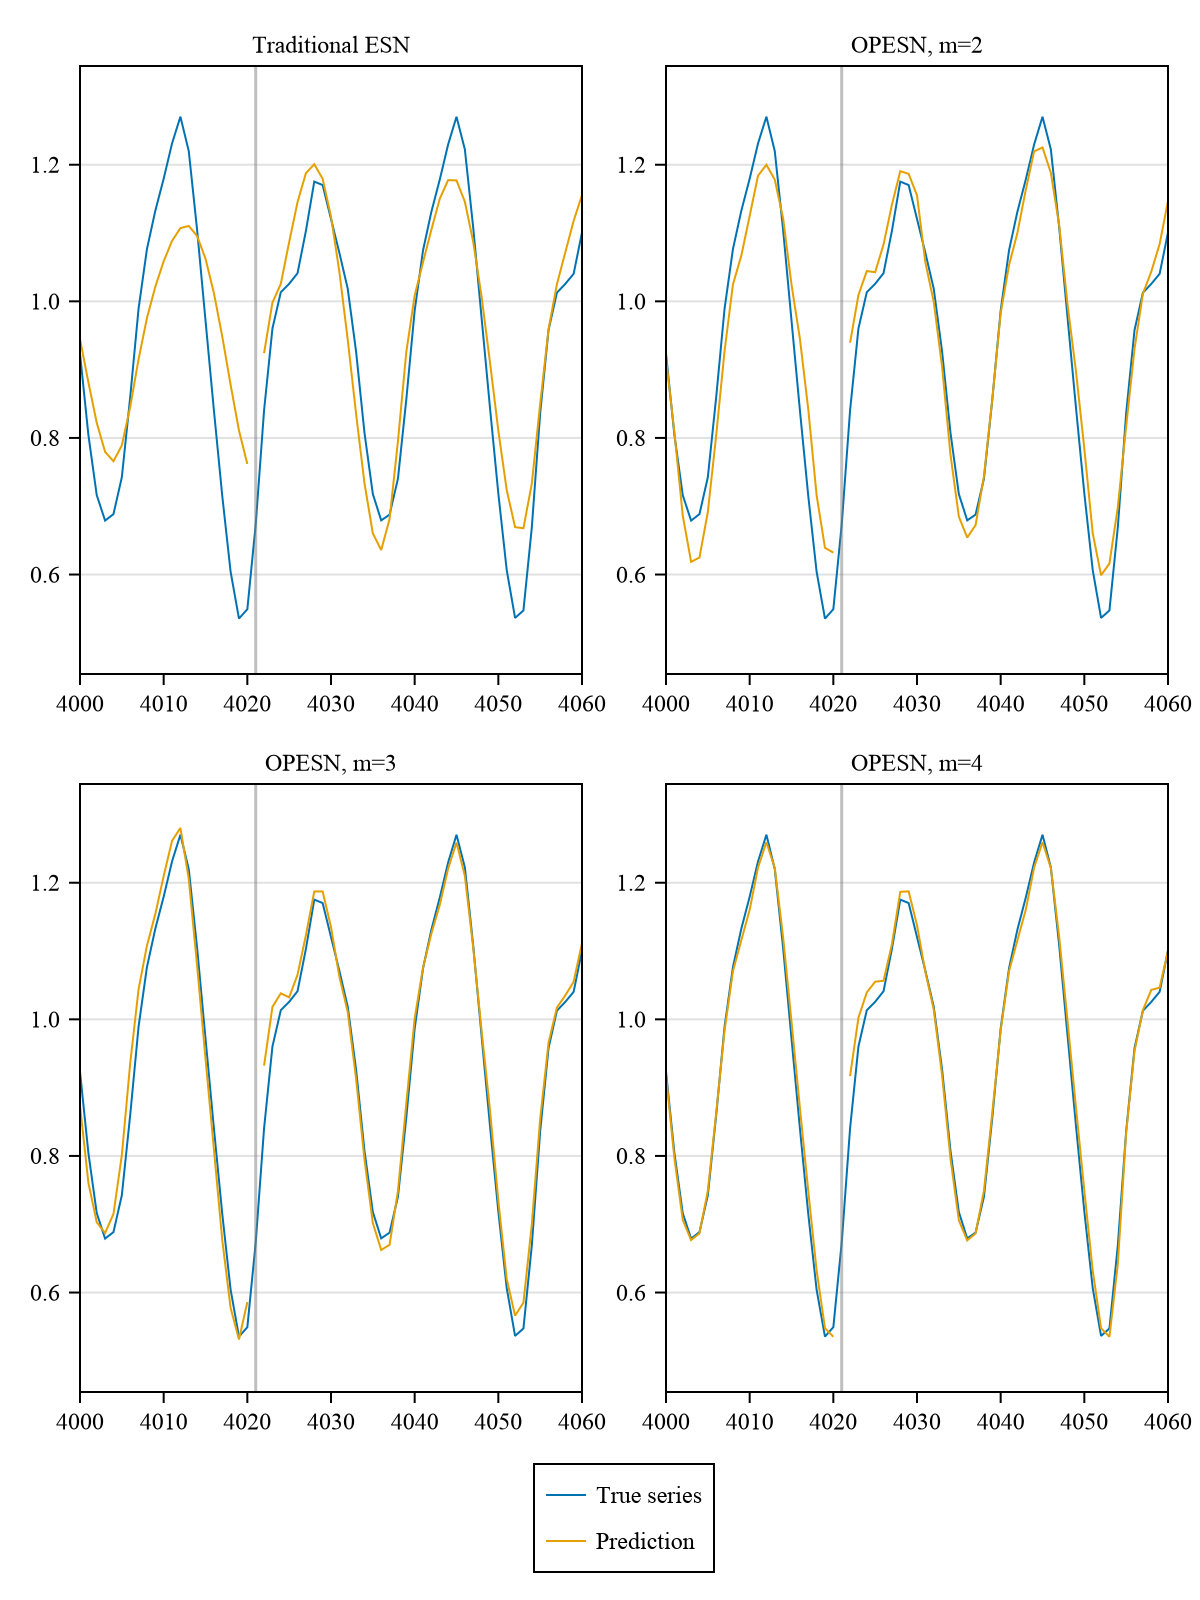

In [14]:
show_windows = 1

# MG:
# 5041
#times_5: 4069

# Lorenz:
# 5041
#times_5: 2700 maybe
fig = freerun_plot(
    test_data,
    preds,
    ["Traditional ESN", architecture * ", m=2", architecture * ", m=3", architecture * ", m=4"],
    4000, 4000+(chunk_size*show_windows);
    mark_every=chunk_size,
    plot_height=400)

In [15]:
save(architecture * "_freerun_recursive_" * data * (time_step_5 ? "_times_5_ts" : "") * ".pdf", fig)

CairoMakie.Screen{PDF}


# Direct

In [1]:
data = "Mackie_Glass"
time_step_5 = false
noise_std = 0.1
R_delay = 100
show_windows = 5
testing_params = create_testing_params(
    readout_switching = true
)
τ = 20

architecture = testing_params.readout_switching ? "ORSESN" : "OPESN"


if data == "Mackie_Glass" && !time_step_5
    test_data = mg_test
    train_data = mg_train
elseif data == "Mackie_Glass" && time_step_5
    test_data = mg_test_5
    train_data = mg_train_5
elseif data == "Rossler" && !time_step_5
    test_data = ro_test
    train_data = ro_train
elseif data == "Rossler" && time_step_5
    test_data = ro_test_5
    train_data = ro_train_5
elseif data == "Lorenz" && !time_step_5
    test_data = lo_test
    train_data = lo_train
elseif data == "Lorenz" && time_step_5
    test_data = lo_test_5
    train_data = lo_train_5
else
    @assert(false)
end

ks = [468, 234, 78, 20]

preds = [
    create_pred_for_params_single_step(
        add_gaussian_noise(copy(train_data), noise_std),
        test_data[1:3000], m; k = testing_params.readout_switching ? 468 : ks[m], testing_params=testing_params, τ=τ, R_delay=R_delay
    ) for m in 1:4]

fig = freerun_plot(
    test_data[1:4000],
    preds,
    ["Traditional ESN", architecture * ", m=2", architecture * ", m=3", architecture * ", m=4"],
    1000, 1000+(R_delay*show_windows);
    ignore_first=1000, offset=R_delay,#y_start=-10, y_end=12
    plot_height=400)

fig

UndefVarError: UndefVarError: `create_testing_params` not defined

In [7]:
# save(architecture * "_freerun_direct_" * data * (time_step_5 ? "_times_5_ts" : "") * ".pdf", fig)